In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv("C:/Users/HP/Downloads/NFLX.csv")

In [10]:
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [11]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
    return np.array(sequences)

In [13]:
sequence_length = 30  # Adjust as needed
sequences = create_sequences(data['Close'], sequence_length)

In [14]:
X = sequences[:, :-1]
y = sequences[:, -1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [29]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
13/13 [==============================] - 6s 51ms/step - loss: 0.0419
Epoch 2/50
13/13 [==============================] - 1s 44ms/step - loss: 0.0068
Epoch 3/50
13/13 [==============================] - 1s 45ms/step - loss: 0.0038
Epoch 4/50
13/13 [==============================] - 1s 45ms/step - loss: 0.0029
Epoch 5/50
13/13 [==============================] - 1s 49ms/step - loss: 0.0027
Epoch 6/50
13/13 [==============================] - 1s 46ms/step - loss: 0.0027
Epoch 7/50
13/13 [==============================] - 1s 49ms/step - loss: 0.0026
Epoch 8/50
13/13 [==============================] - 1s 112ms/step - loss: 0.0026
Epoch 9/50
13/13 [==============================] - 1s 51ms/step - loss: 0.0025
Epoch 10/50
13/13 [==============================] - 1s 55ms/step - loss: 0.0025
Epoch 11/50
13/13 [==============================] - 1s 49ms/step - loss: 0.0024
Epoch 12/50
13/13 [==============================] - 1s 51ms/step - loss: 0.0024
Epoch 13/50
13/13 [=================

In [33]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0014630213004355555


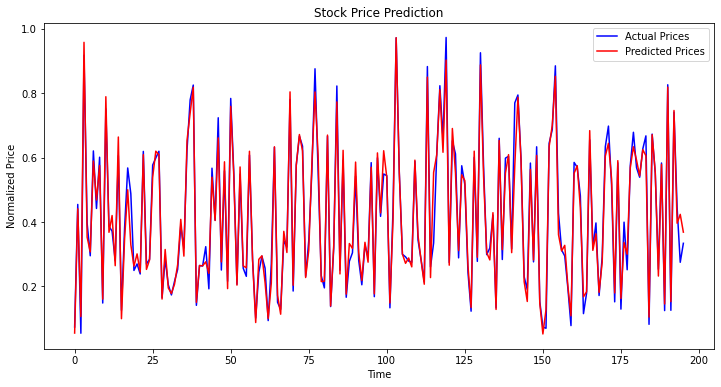

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Prices", color='b')
plt.plot(y_pred, label="Predicted Prices", color='r')
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.show()